# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

## Encoding categorical data

In [3]:
# oneHotEncoding the city names from col3
# unique catIDs in the first 3 cols after OHE
# NY 001, Cal 100, FL 010
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

x = np.array(ct.fit_transform(x))

In [4]:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
# In multipleLinReg no need to do feature scaling
# scikit-learn will handle dummy var trap

## Training the Multiple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [11]:
# 
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Checking Model Accuracy

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# MSR does not take to account the scale of data, but R2 does
# mse = mean_squared_error(y_test, y_pred)
# MSE = np.square(np.subtract(y_test,y_pred)).mean()
# print(mse)
# print(MSE)

r2 = r2_score(y_test,y_pred)
print(r2)

0.9347068473282515


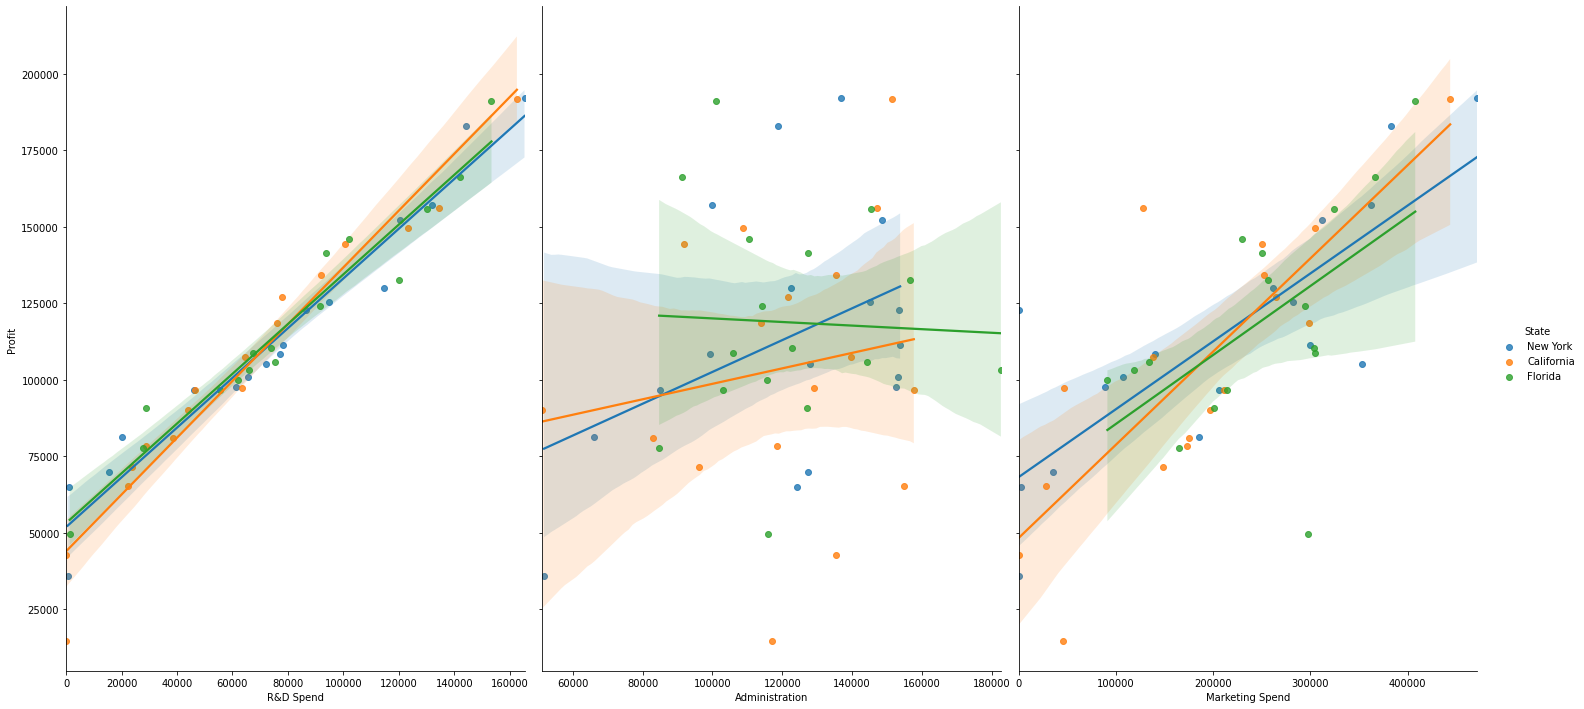

In [40]:
import seaborn as sns
# seaborn can only plot from dataframes
sns.pairplot(dataset, x_vars=['R&D Spend','Administration','Marketing Spend'], hue="State", y_vars='Profit', height=10, aspect=0.7, kind='reg')
